In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import koreanize_matplotlib

C:\Users\ghdau\AppData\Roaming\Python\Python38\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [102]:
df = pd.read_csv('./data/lab1-baby-20231019.csv',encoding = 'cp949')
df.head()

,시군구별,1997.01,1997.01.1,1997.01.2,1997.02,1997.02.1,1997.02.2,1997.03,1997.03.1,1997.03.2,...,2022.09.2,2022.10,2022.10.1,2022.10.2,2022.11,2022.11.1,2022.11.2,2022.12,2022.12.1,2022.12.2
0,시군구별,계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),...,여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명)
1,전국,63268,33266,30002,58144,30086,28058,62160,32333,29827,...,10715,20646,10530,10116,18981,9737,9244,16896,8684,8212
2,서울특별시,13205,6886,6319,12239,6224,6015,13358,6947,6411,...,1831,3612,1794,1818,3230,1678,1552,2901,1472,1429
3,부산광역시,4201,2260,1941,3910,2104,1806,4304,2234,2070,...,575,1166,602,564,977,479,498,957,528,429
4,대구광역시,3345,1764,1581,2994,1608,1386,3337,1815,1522,...,416,848,428,420,802,406,396,663,334,329


In [103]:
df_melt = df.melt(id_vars='시군구별')
df_melt

,시군구별,variable,value
0,시군구별,1997.01,계 (명)
1,전국,1997.01,63268
2,서울특별시,1997.01,13205
3,부산광역시,1997.01,4201
4,대구광역시,1997.01,3345
...,...,...,...
17779,전라북도,2022.12.2,229
17780,전라남도,2022.12.2,250
17781,경상북도,2022.12.2,366
17782,경상남도,2022.12.2,503


In [104]:
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17784 entries, 0 to 17783
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시군구별      17784 non-null  object
 1   variable  17784 non-null  object
 2   value     17784 non-null  object
dtypes: object(3)
memory usage: 416.9+ KB


In [105]:
df_melt.columns = ['시군구별','날짜','출생아수']
df_melt

,시군구별,날짜,출생아수
0,시군구별,1997.01,계 (명)
1,전국,1997.01,63268
2,서울특별시,1997.01,13205
3,부산광역시,1997.01,4201
4,대구광역시,1997.01,3345
...,...,...,...
17779,전라북도,2022.12.2,229
17780,전라남도,2022.12.2,250
17781,경상북도,2022.12.2,366
17782,경상남도,2022.12.2,503


In [106]:
df_melt = df_melt[(df_melt['시군구별'] != '시군구별') & (df_melt['시군구별'] != '전국')]
df_melt

,시군구별,날짜,출생아수
2,서울특별시,1997.01,13205
3,부산광역시,1997.01,4201
4,대구광역시,1997.01,3345
5,인천광역시,1997.01,3646
6,광주광역시,1997.01,2166
...,...,...,...
17779,전라북도,2022.12.2,229
17780,전라남도,2022.12.2,250
17781,경상북도,2022.12.2,366
17782,경상남도,2022.12.2,503


In [107]:
df_melt['연도'] =  df_melt["날짜"].str.split('.' , expand = True)[0]
df_melt['월'] =  df_melt["날짜"].str.split('.' , expand = True)[1]
df_melt['성별'] =  df_melt["날짜"].str.split('.' , expand = True)[2]
df_melt

C:\Users\ghdau\AppData\Local\Temp\ipykernel_19660\2841688038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_melt['연도'] =  df_melt["날짜"].str.split('.' , expand = True)[0]
C:\Users\ghdau\AppData\Local\Temp\ipykernel_19660\2841688038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_melt['월'] =  df_melt["날짜"].str.split('.' , expand = True)[1]
C:\Users\ghdau\AppData\Local\Temp\ipykernel_19660\2841688038.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,시군구별,날짜,출생아수,연도,월,성별
2,서울특별시,1997.01,13205,1997,01,None
3,부산광역시,1997.01,4201,1997,01,None
4,대구광역시,1997.01,3345,1997,01,None
5,인천광역시,1997.01,3646,1997,01,None
6,광주광역시,1997.01,2166,1997,01,None
...,...,...,...,...,...,...
17779,전라북도,2022.12.2,229,2022,12,2
17780,전라남도,2022.12.2,250,2022,12,2
17781,경상북도,2022.12.2,366,2022,12,2
17782,경상남도,2022.12.2,503,2022,12,2


In [108]:
df_melt['성별'] = df_melt['성별'].fillna('전체')
df_melt['성별']

C:\Users\ghdau\AppData\Local\Temp\ipykernel_19660\3502763917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_melt['성별'] = df_melt['성별'].fillna('전체')


2        전체
3        전체
4        전체
5        전체
6        전체
         ..
17779     2
17780     2
17781     2
17782     2
17783     2
Name: 성별, Length: 15912, dtype: object

In [109]:
df_melt = df_melt.drop(['날짜'], axis = 1)
df_melt

,시군구별,출생아수,연도,월,성별
2,서울특별시,13205,1997,01,전체
3,부산광역시,4201,1997,01,전체
4,대구광역시,3345,1997,01,전체
5,인천광역시,3646,1997,01,전체
6,광주광역시,2166,1997,01,전체
...,...,...,...,...,...
17779,전라북도,229,2022,12,2
17780,전라남도,250,2022,12,2
17781,경상북도,366,2022,12,2
17782,경상남도,503,2022,12,2


In [110]:
df_melt['성별'] = df_melt['성별'].replace('1','남자').replace('2','여자')
df_melt['성별']

2        전체
3        전체
4        전체
5        전체
6        전체
         ..
17779    여자
17780    여자
17781    여자
17782    여자
17783    여자
Name: 성별, Length: 15912, dtype: object

In [111]:
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15912 entries, 2 to 17783
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군구별    15912 non-null  object
 1   출생아수    15912 non-null  object
 2   연도      15912 non-null  object
 3   월       15912 non-null  object
 4   성별      15912 non-null  object
dtypes: object(5)
memory usage: 745.9+ KB


In [112]:
df_melt['출생아수'].value_counts()

출생아수
-       540
549      29
656      26
609      23
588      23
       ... 
8413      1
5101      1
4386      1
5469      1
2901      1
Name: count, Length: 4068, dtype: int64

In [113]:
df_melt['출생아수'] = df_melt['출생아수'].replace('-',np.nan).astype(float)
df_melt['출생아수']

2        13205.0
3         4201.0
4         3345.0
5         3646.0
6         2166.0
          ...   
17779      229.0
17780      250.0
17781      366.0
17782      503.0
17783      121.0
Name: 출생아수, Length: 15912, dtype: float64

In [114]:
df_melt['시군구별'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

In [115]:
df_melt.head()

,시군구별,출생아수,연도,월,성별
2,서울특별시,13205.0,1997,01,전체
3,부산광역시,4201.0,1997,01,전체
4,대구광역시,3345.0,1997,01,전체
5,인천광역시,3646.0,1997,01,전체
6,광주광역시,2166.0,1997,01,전체


C:\Users\ghdau\AppData\Local\Temp\ipykernel_19660\1530838430.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = '연도',y='출생아수',data=df_melt,hue='시군구별',ci = None)


<Axes: xlabel='연도', ylabel='출생아수'>

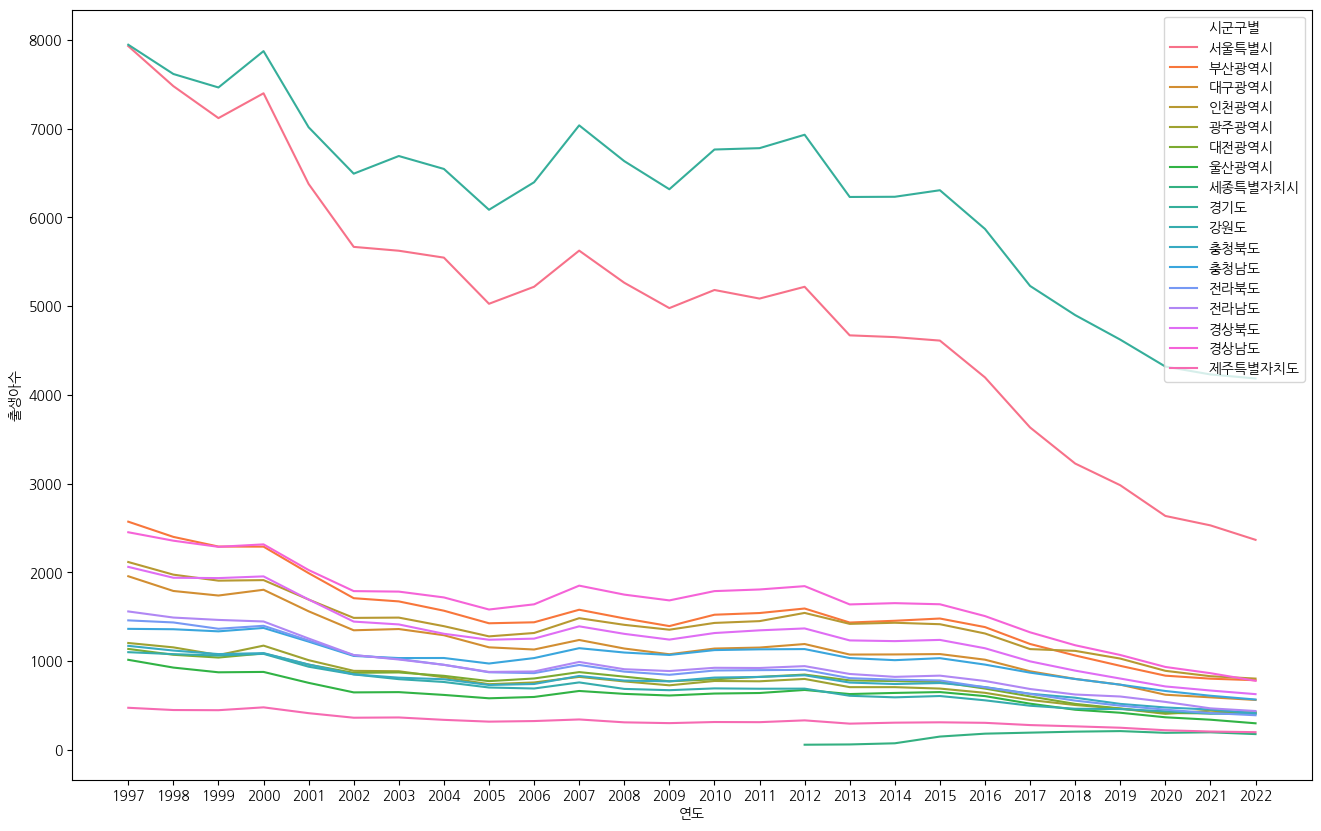

In [116]:
plt.figure(figsize=[16,10])
sns.lineplot(x = '연도',y='출생아수',data=df_melt,hue='시군구별',ci = None)

C:\Users\ghdau\AppData\Local\Temp\ipykernel_19660\210495393.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x = '연도',y='출생아수',data=df_melt,hue='시군구별',ci = None)


<Axes: xlabel='연도', ylabel='출생아수'>

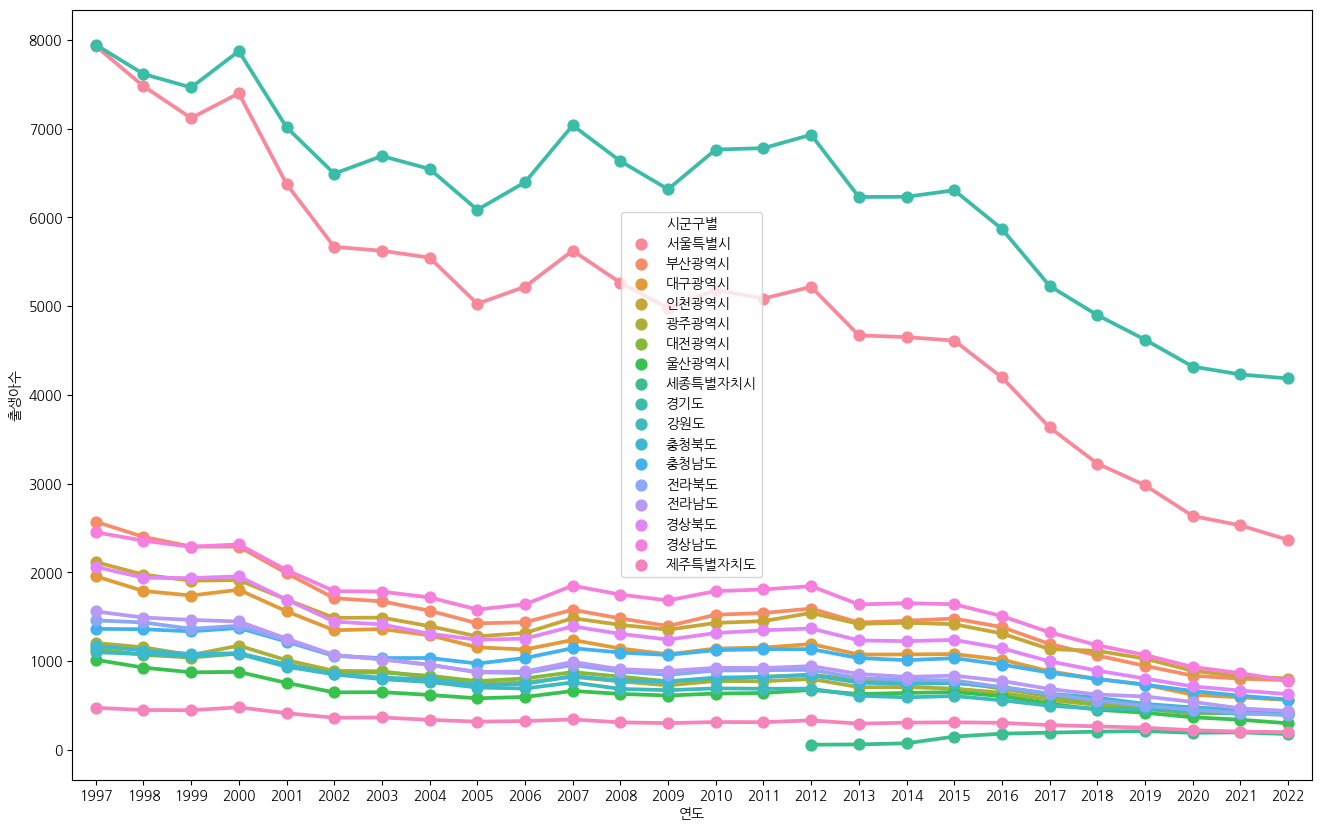

In [117]:
plt.figure(figsize=[16,10])
sns.pointplot(x = '연도',y='출생아수',data=df_melt,hue='시군구별',ci = None)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 200x100 with 0 Axes>

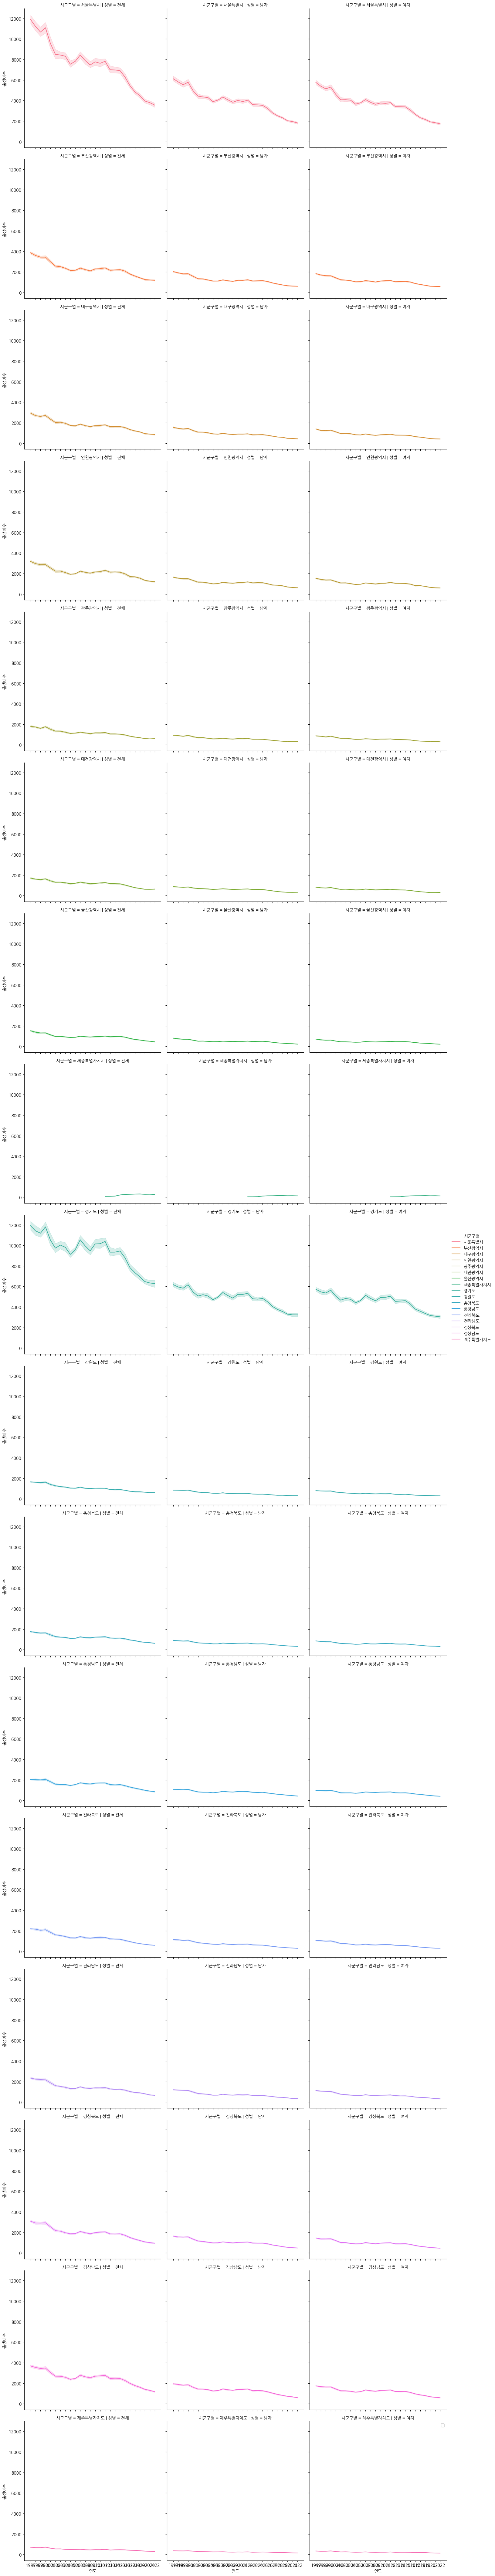

In [118]:
plt.figure(figsize=[2,1])
sns.relplot(x ='연도',
             y='출생아수',
             data =df_melt,
             hue = '시군구별',
             row = '시군구별',
             col = '성별',
             kind = 'line'
             )
plt.legend(loc='best')

In [120]:
df_melt.to_csv('the_number_of_babies_by_region.csv')

In [149]:
df_busan = df_melt[df_melt['시군구별'] == '부산광역시']
df_busan

,시군구별,출생아수,연도,월,성별
3,부산광역시,4201.0,1997,01,전체
22,부산광역시,2260.0,1997,01,남자
41,부산광역시,1941.0,1997,01,여자
60,부산광역시,3910.0,1997,02,전체
79,부산광역시,2104.0,1997,02,남자
...,...,...,...,...,...
17692,부산광역시,479.0,2022,11,남자
17711,부산광역시,498.0,2022,11,여자
17730,부산광역시,957.0,2022,12,전체
17749,부산광역시,528.0,2022,12,남자


In [150]:
df_seoul = df_melt[df_melt['시군구별'] == '서울특별시']
df_seoul

,시군구별,출생아수,연도,월,성별
2,서울특별시,13205.0,1997,01,전체
21,서울특별시,6886.0,1997,01,남자
40,서울특별시,6319.0,1997,01,여자
59,서울특별시,12239.0,1997,02,전체
78,서울특별시,6224.0,1997,02,남자
...,...,...,...,...,...
17691,서울특별시,1678.0,2022,11,남자
17710,서울특별시,1552.0,2022,11,여자
17729,서울특별시,2901.0,2022,12,전체
17748,서울특별시,1472.0,2022,12,남자


In [151]:
df_seoul['시군구별'].unique()[0]

'서울특별시'

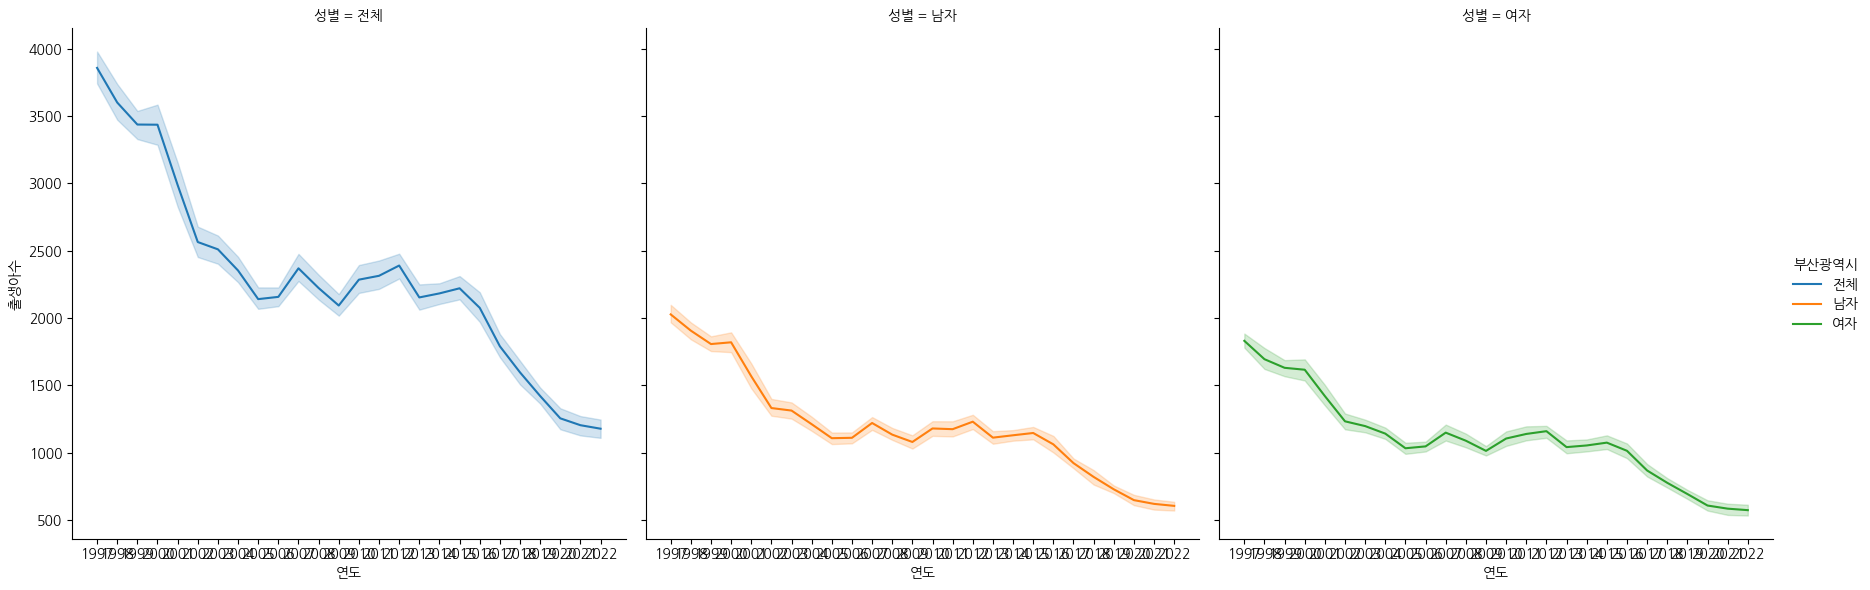

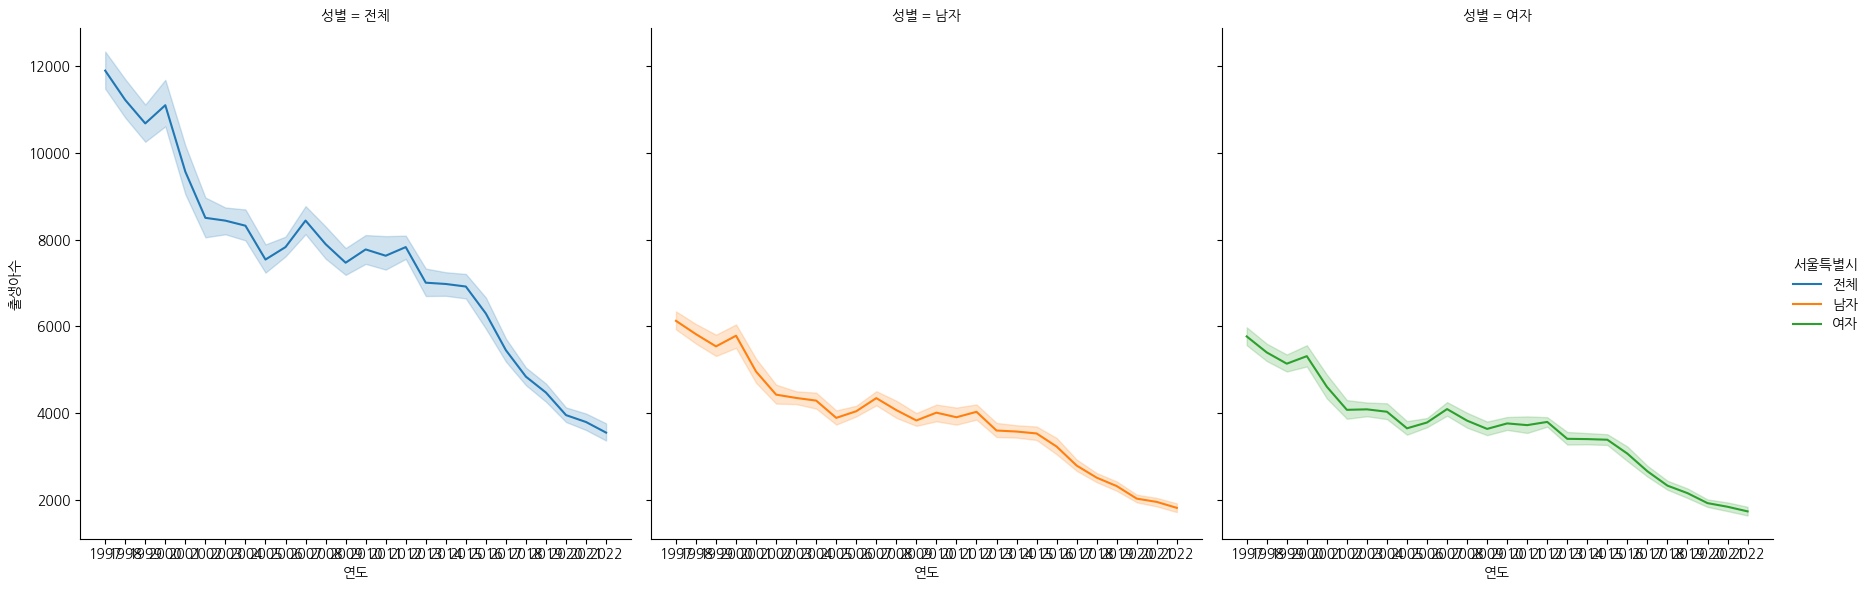

In [152]:
df_two = [df_busan,df_seoul]

for df in df_two:
    g = sns.FacetGrid(df,col='성별', hue = '성별',height = 6)
    g.map(sns.lineplot,'연도','출생아수')
    g.add_legend(title= df['시군구별'].unique()[0])

C:\Users\ghdau\anaconda3\envs\pybook\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\ghdau\anaconda3\envs\pybook\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


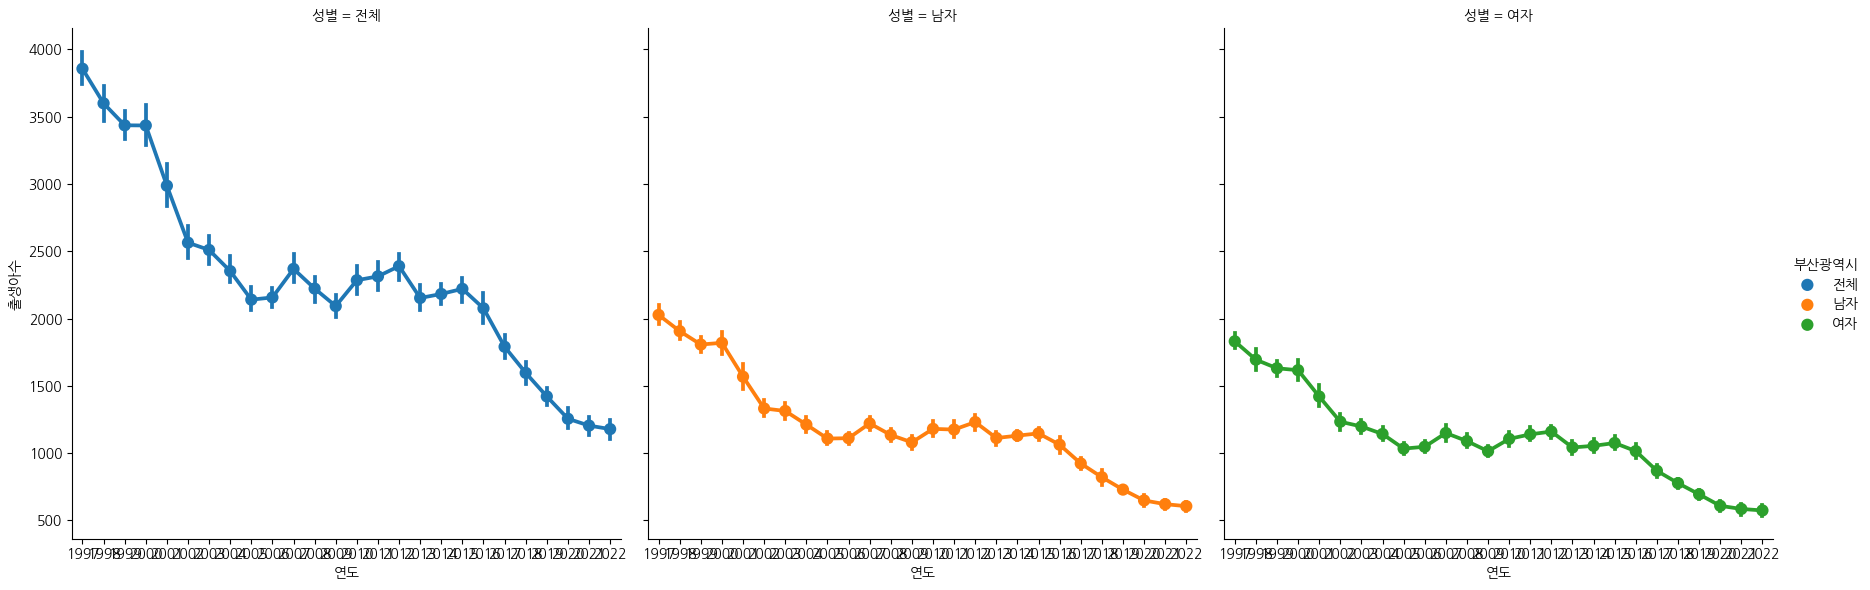

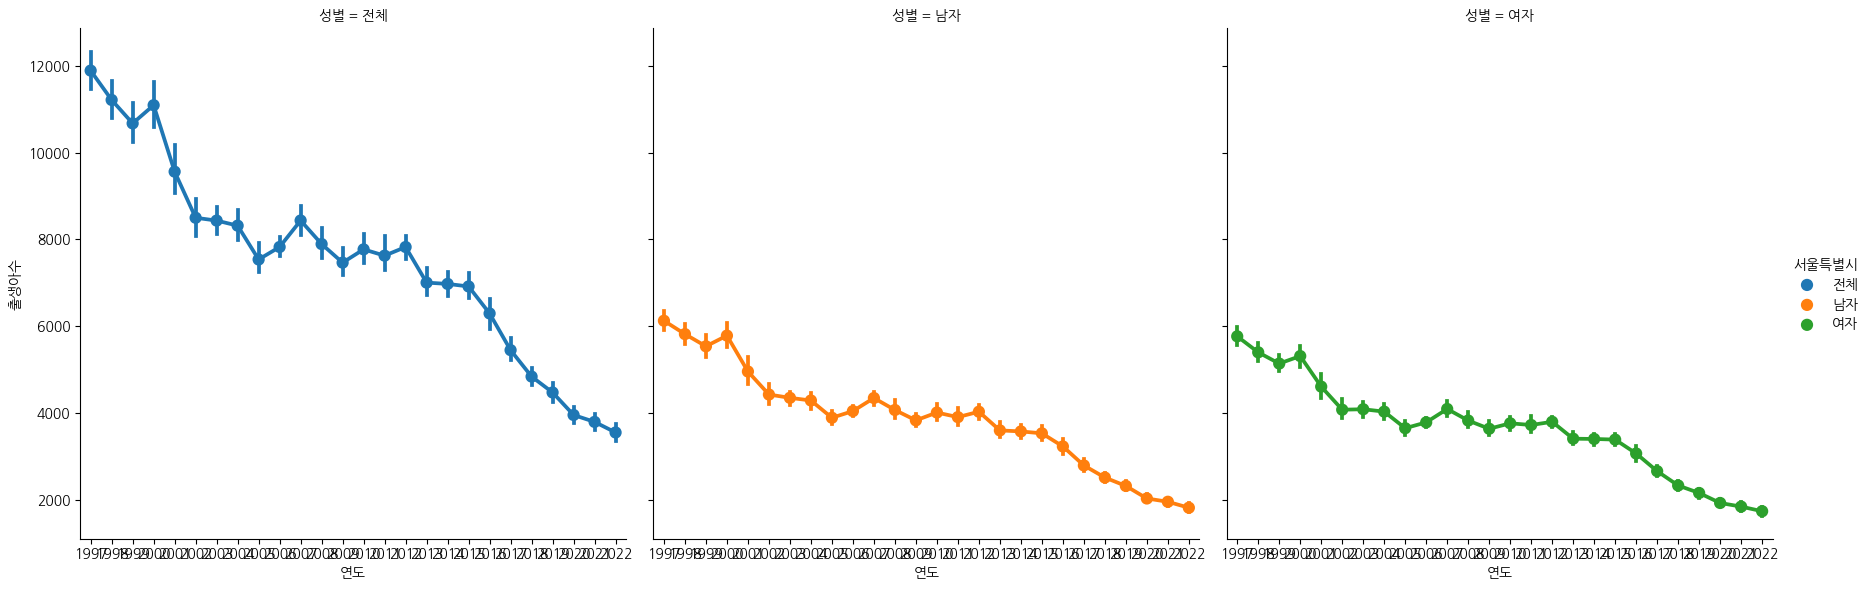

In [153]:
for df in df_two:
    g = sns.FacetGrid(df,col='성별', hue = '성별',height = 6)
    g.map(sns.pointplot,'연도','출생아수')
    g.add_legend(title= df['시군구별'].unique()[0])

C:\Users\ghdau\anaconda3\envs\pybook\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\ghdau\anaconda3\envs\pybook\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


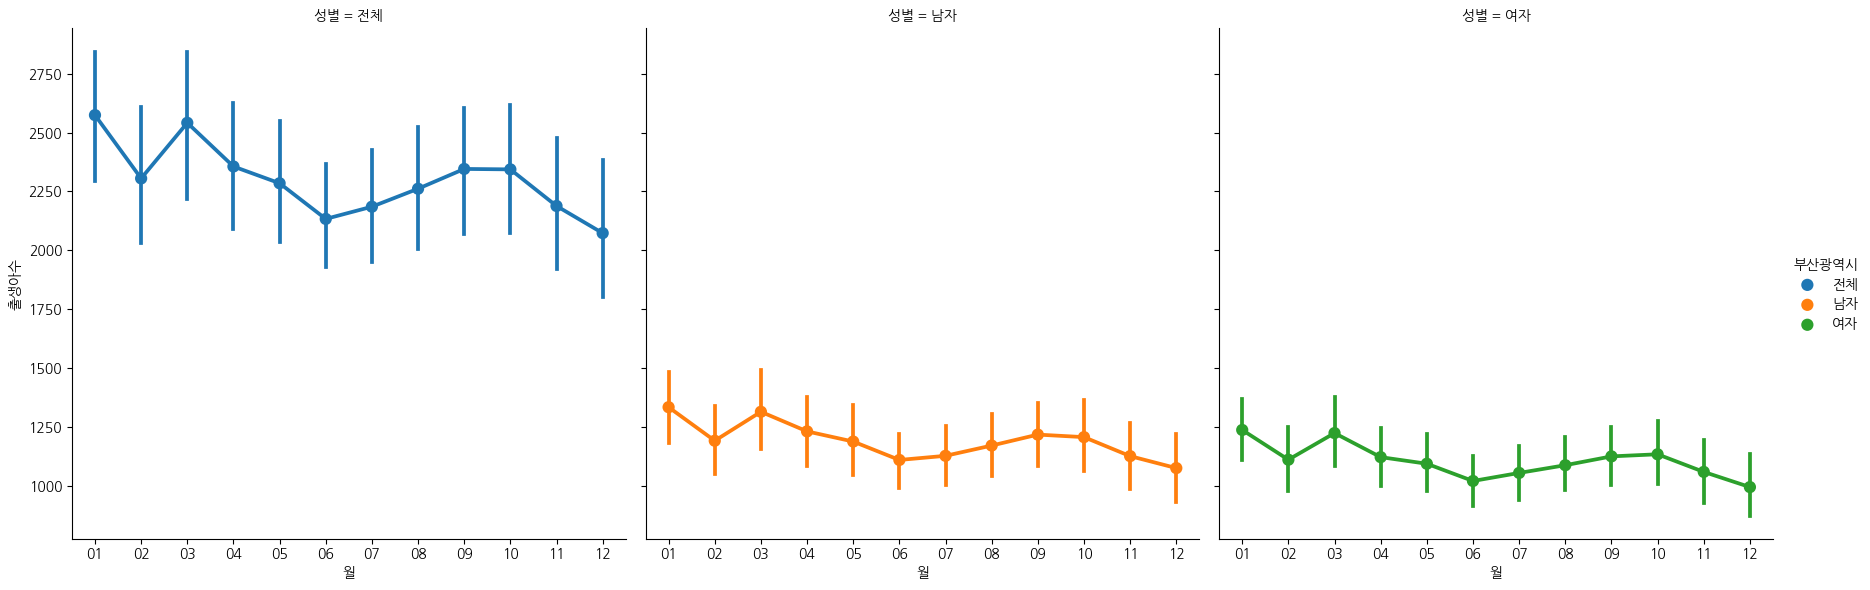

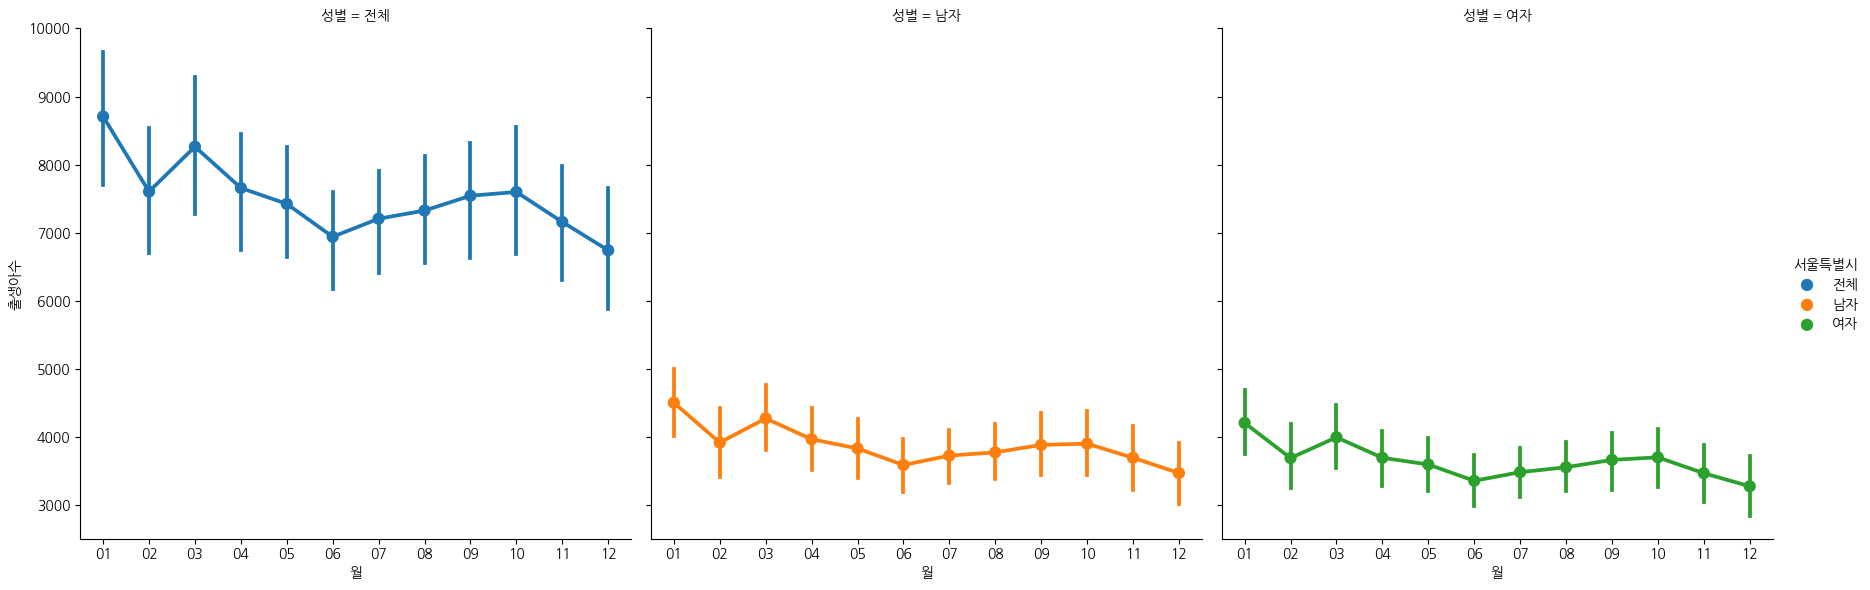

In [157]:
for df in df_two:
    g = sns.FacetGrid(df,col='성별', hue = '성별',height = 6)
    g.map(sns.pointplot,'월','출생아수')
    g.add_legend(title= df['시군구별'].unique()[0])